array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

array([[-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j]])

┌───┐ ░     ░ ┌───┐┌───┐   ┌───┐ ░ 
q_0: ┤ H ├─░──■──░─┤ H ├┤ Z ├─■─┤ H ├─░─
     ├───┤ ░  │  ░ ├───┤├───┤ │ ├───┤ ░ 
q_1: ┤ H ├─░──■──░─┤ H ├┤ Z ├─■─┤ H ├─░─
     └───┘ ░     ░ └───┘└───┘   └───┘ ░

[1.96261557e-16-3.69778549e-32j 1.96261557e-16+1.22464680e-16j
 2.22044605e-16+1.22464680e-16j 1.00000000e+00-2.44929360e-16j]
{'11': 1.0}


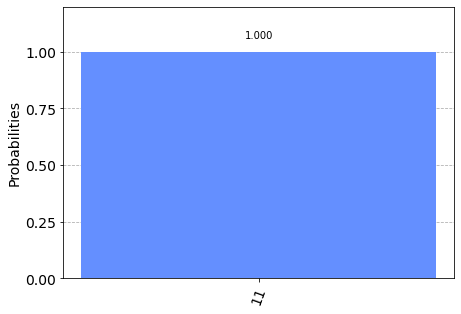

In [6]:
# Experiment 1
# %load ~cis492s/pub/Grover2.py
#initialization
import numpy as np

# importing Qiskit
from qiskit import Aer, assemble, transpile
from qiskit import QuantumCircuit, quantum_info

from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

n = 2

# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
    m = nb-1
    k = 0
    while t > 0:
        k |= (t & 1) << m
        t >>= 1
        m -= 1
    return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb) : 
    newv = np.copy(v)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newv[i] = v[ni] 
         
    return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb) : 
    newm = np.copy(m)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newm[i][i] = m[ni][ni]

    return newm 

def Oracle():  ## select 11
    oc = QuantumCircuit(n)
    
    # cz: control q0, target q1 
    oc.cz(0, 1) 
    display(rdm(quantum_info.Operator(oc).data,n))

    return oc

def A(): ## amplitude amplification via fliiping around the mean 
    ac = QuantumCircuit(2)
    ac.h(range(2))
    ac.z(range(2))
    ac.cz(0,1)
    ac.h(range(2))
    display(rdm(quantum_info.Operator(ac).data,n))


    return ac

qc = QuantumCircuit(n)

qc.h(range(n))

qc.barrier()

# query the Oracle:  phase inversion
qc.compose(Oracle(),inplace=True)

qc.barrier()

# amplitude magnification
qc.compose(A(),inplace=True)

qc.barrier()

# Do NOT call measure() because we want to see the probability amplitudes in the statevector

display(qc.draw())

aer_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = aer_sim.run(qobj,shots=1000).result()

out_state = result.get_statevector()
print(rv(out_state.data,n))

# Because we don't call measure(), get_counts() returns the probabilities
pbty = result.get_counts()

# we have to reverse the string in the dictionary pbty
answer = {}
for str in pbty:
    answer[str[::-1]] = pbty[str]

print(answer)

plot_histogram(answer)



array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

array([[-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j]])

┌───┐ ░ ┌───┐   ┌───┐ ░ ┌───┐┌───┐   ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├┤ Z ├─■─┤ H ├─░─
     ├───┤ ░ └───┘ │ └───┘ ░ ├───┤├───┤ │ ├───┤ ░ 
q_1: ┤ H ├─░───────■───────░─┤ H ├┤ Z ├─■─┤ H ├─░─
     └───┘ ░               ░ └───┘└───┘   └───┘ ░

[ 0.00000000e+00+0.00000000e+00j  1.00000000e+00-2.44929360e-16j
 -7.49879891e-33+3.69778549e-32j  7.49879891e-33+1.22464680e-16j]
{'01': 1.0}


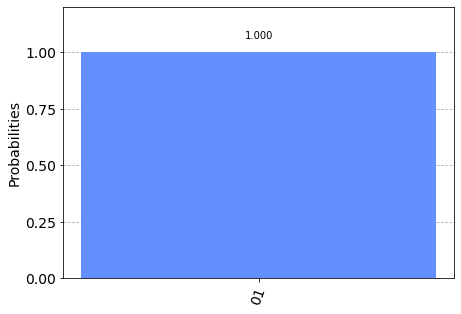

In [11]:
# Experiment 2
# %load ~cis492s/pub/Grover2.py
#initialization
import numpy as np

# importing Qiskit
from qiskit import Aer, assemble, transpile
from qiskit import QuantumCircuit, quantum_info

from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

n = 2

# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
    m = nb-1
    k = 0
    while t > 0:
        k |= (t & 1) << m
        t >>= 1
        m -= 1
    return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb) : 
    newv = np.copy(v)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newv[i] = v[ni] 
         
    return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb) : 
    newm = np.copy(m)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newm[i][i] = m[ni][ni]

    return newm 

def Oracle():  ## select 11
    oc = QuantumCircuit(n)
    
    # cz: control q0, target q1 
    oc.cz(0, 1) 
    display(rdm(quantum_info.Operator(oc).data,n))

    return oc

def A(): ## amplitude amplification via fliiping around the mean 
    ac = QuantumCircuit(2)
    ac.h(range(2))
    ac.z(range(2))
    ac.cz(0,1)
    ac.h(range(2))
    display(rdm(quantum_info.Operator(ac).data,n))


    return ac

qc = QuantumCircuit(n)

qc.h(range(n))

qc.barrier()

qc.x(0)
# query the Oracle:  phase inversion
qc.compose(Oracle(),inplace=True)
qc.x(0)
qc.barrier()

# amplitude magnification
qc.compose(A(),inplace=True)

qc.barrier()

# Do NOT call measure() because we want to see the probability amplitudes in the statevector

display(qc.draw())

aer_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = aer_sim.run(qobj,shots=1000).result()

out_state = result.get_statevector()
print(rv(out_state.data,n))

# Because we don't call measure(), get_counts() returns the probabilities
pbty = result.get_counts()

# we have to reverse the string in the dictionary pbty
answer = {}
for str in pbty:
    answer[str[::-1]] = pbty[str]

print(answer)

plot_histogram(answer)



[ 0.30935922-6.98177070e-16j  0.30935922-7.25238197e-16j
  0.30935922-7.09001521e-16j  0.30935922-7.68536000e-16j
  0.30935922-7.09001521e-16j  0.30935922-7.68536000e-16j
  0.30935922-7.52299324e-16j -0.57452426+1.16904068e-15j]
{'000': 0.095703125, '100': 0.095703125, '010': 0.095703125, '110': 0.095703125, '001': 0.095703125, '101': 0.095703125, '011': 0.095703125, '111': 0.330078125}


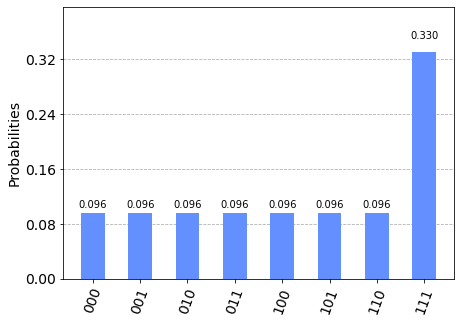

In [18]:
# Experiment 3
# %load ~cis492s/pub/Grover3.py
#initialization
import numpy as np

# importing Qiskit
from qiskit import Aer, assemble, transpile, quantum_info
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
    m = nb-1
    k = 0
    while t > 0:
        k |= (t & 1) << m
        t >>= 1
        m -= 1
    return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb) : 
    newv = np.copy(v)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newv[i] = v[ni] 
         
    return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb) : 
    newm = np.copy(m)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newm[i][i] = m[ni][ni]

    return newm 

n = 3

def Oracle():  ## select q0 q1 q2: 111
    oc = QuantumCircuit(n)

    # use ccx and H-gates to achieve ccz
    oc.h(2)
    oc.ccx(0,1,2)
    oc.h(2)

    return oc

def A(nb): ## amplitude amplification via fliiping around the mean 
    ac = QuantumCircuit(nb)
    ac.h(range(nb))

    ac.x(range(nb))

    # Do multi-controlled-Z gate
    ac.h(nb-1)
    ac.mcx(list(range(nb-1)), nb-1)  # multi-controlled
    ac.h(nb-1)

    ac.x(range(nb))

    ac.h(range(nb))

    return ac


qc = QuantumCircuit(n)

qc.h(range(n))

# query the Oracle
qc.compose(Oracle(),inplace=True)

# amplitude magnification
qc.compose(A(n),inplace=True)

# query the Oracle
qc.compose(Oracle(),inplace=True)

# amplitude magnification
qc.compose(A(n),inplace=True)

# Do NOT call measure() because we want to see the probability amplitudes in the statevector

aer_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = aer_sim.run(qobj,shots=1000).result()

out_state = result.get_statevector()
print(rv(out_state.data,n))

counts = result.get_counts()

# we have to reverse the string in the dictionary counts 
answer = {}
for str in counts:
    answer[str[::-1]] = counts[str]

print(answer)

plot_histogram(answer)



[-0.08838835+2.05664563e-16j  0.97227182-1.19068958e-15j
 -0.08838835+1.62366761e-16j -0.08838835+1.73191211e-16j
 -0.08838835+1.62366761e-16j -0.08838835+1.73191211e-16j
 -0.08838835+1.40717859e-16j -0.08838835+1.29893408e-16j]
{'000': 0.0078125, '100': 0.0078125, '010': 0.0078125, '110': 0.0078125, '001': 0.9453125, '101': 0.0078125, '011': 0.0078125, '111': 0.0078125}


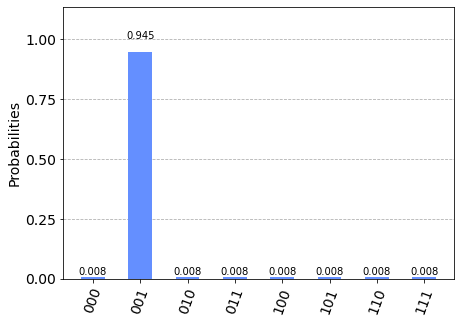

In [22]:
# Experiment 4
# %load ~cis492s/pub/Grover3.py
#initialization
import numpy as np

# importing Qiskit
from qiskit import Aer, assemble, transpile, quantum_info
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
    m = nb-1
    k = 0
    while t > 0:
        k |= (t & 1) << m
        t >>= 1
        m -= 1
    return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb) : 
    newv = np.copy(v)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newv[i] = v[ni] 
         
    return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb) : 
    newm = np.copy(m)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newm[i][i] = m[ni][ni]

    return newm 

n = 3

def Oracle():  ## select q0 q1 q2: 111
    oc = QuantumCircuit(n)

    # use ccx and H-gates to achieve ccz
    oc.h(2)
    oc.ccx(0,1,2)
    oc.h(2)

    return oc

def A(nb): ## amplitude amplification via fliiping around the mean 
    ac = QuantumCircuit(nb)
    ac.h(range(nb))

    ac.x(range(nb))

    # Do multi-controlled-Z gate
    ac.h(nb-1)
    ac.mcx(list(range(nb-1)), nb-1)  # multi-controlled
    ac.h(nb-1)

    ac.x(range(nb))

    ac.h(range(nb))

    return ac


qc = QuantumCircuit(n)

qc.h(range(n))

qc.x(0)
qc.x(1)
# query the Oracle
qc.compose(Oracle(),inplace=True)
qc.x(0)
qc.x(1)
# amplitude magnification
qc.compose(A(n),inplace=True)
qc.x(0)
qc.x(1)
# query the Oracle
qc.compose(Oracle(),inplace=True)
qc.x(0)
qc.x(1)
# amplitude magnification
qc.compose(A(n),inplace=True)

# Do NOT call measure() because we want to see the probability amplitudes in the statevector

aer_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = aer_sim.run(qobj,shots=1000).result()

out_state = result.get_statevector()
print(rv(out_state.data,n))

counts = result.get_counts()

# we have to reverse the string in the dictionary counts 
answer = {}
for str in counts:
    answer[str[::-1]] = counts[str]

print(answer)

plot_histogram(answer)



In [30]:
# Experiment 5
import pylab
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.tools.visualization import plot_histogram
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library.phase_oracle import PhaseOracle


In [31]:
# Experiment 5

input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''



     


In [32]:
# Experiment 5
import os
import tempfile
from qiskit.exceptions import MissingOptionalLibraryError

fp = tempfile.NamedTemporaryFile(mode='w+t', delete=False)
fp.write(input_3sat_instance)
file_name = fp.name
fp.close()
oracle = None
try:
    oracle = PhaseOracle.from_dimacs_file(file_name)
except MissingOptionalLibraryError as ex:
    print(ex)
finally:
    os.remove(file_name)


In [33]:

# Experiment 5problem = None
if oracle is not None:
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)




In [34]:
# Experiment 5
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
grover = Grover(quantum_instance=quantum_instance)
result = None
if problem is not None:
    result = grover.amplify(problem)
    print(result.assignment)

011


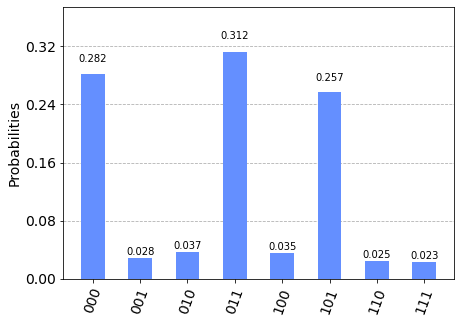

In [35]:

# Experiment 5
if result is not None:
    display(plot_histogram(result.circuit_results[0]))



     


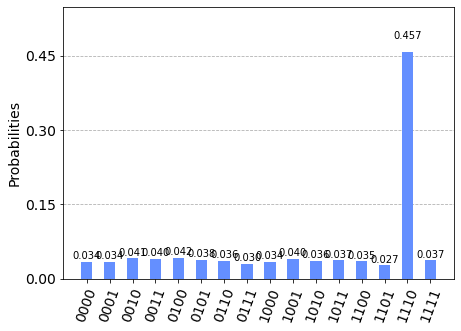

In [36]:
# Experiment 5
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(quantum_instance=QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024))
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)


In [37]:

# Experiment 5
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright



     
